The Iris dataset contains 150 observations across three species of Iris flowers: Setosa, Versicolor, and Virginica, with four features — Sepal Length, Sepal Width, Petal Length, and Petal Width. These features serve as the basis for identifying patterns and differentiating the species. Through descriptive statistics, visualization, and predictive modeling, this analysis aims to explore the distinct characteristics of each species and showcase how their features contribute to effective classification. 

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)


In [296]:
path = r'D:\iris\\'
df = pd.read_csv(path + 'iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [297]:
df.drop('Id', axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns={
    'SepalLengthCm': 'Sepal_Length',
    'SepalWidthCm': 'Sepal_Width',
    'PetalLengthCm': 'Petal_Length',
    'PetalWidthCm': 'Petal_Width'
}, inplace=True)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [298]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [299]:
df[df.duplicated()]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [300]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

#### Insights
1. There are 4 numerical columns: SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm, and one categorical column: Species.
2. There are no null values in the dataset
3. There are 3 duplicated rows in the dataset
4. I will rename the Species values to remove the prefix "Iris-", since all flowers belong to the same genus, Iris.

In [302]:
df['Species'] = df['Species'].str.replace("Iris-setosa", "Setosa")
df['Species'] = df['Species'].str.replace("Iris-versicolor", "Versicolor")
df['Species'] = df['Species'].str.replace("Iris-virginica", "Virginica")

In [303]:
df['Species'].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

The dataset is balanced across easch species, I will retain the duplicates.

## Data Visualisation

#### Univariate Analysis

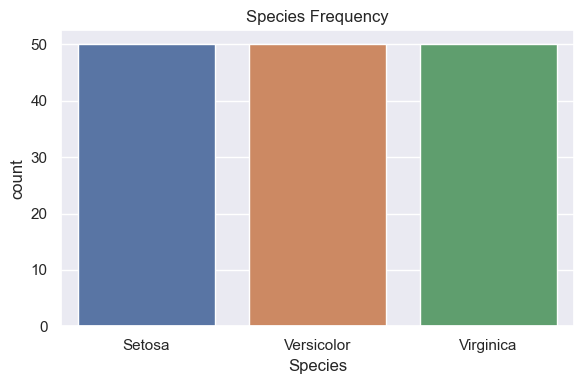

In [306]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Species', data=df, hue='Species')
plt.title('Species Frequency')
plt.tight_layout()
plt.show()

This confirms that each species has 50 as its count and the dataset is balanced across species.

#### Multivariate Analysis

In [309]:
df.groupby('Species').agg(['mean', 'median'])

Sepal_Length        Sepal_Width        Petal_Length         \
                   mean median        mean median         mean median   
Species                                                                 
Setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           Petal_Width         
                  mean median  
Species                        
Setosa           0.244    0.2  
Versicolor       1.326    1.3  
Virginica        2.026    2.0

**Insights**
1. Sepal Length: Virginica has the largest sepal length on average, followed by Versicolor, then Setosa.
2. Sepal Width: Setosa has the widest sepals on average, while Virginica and Versicolor are relatively close in width.
3. Petal Length: Virginica has the longest petals, followed by Versicolor, then Setosa.
4. Petal Width: Similar to petal length, Virginica has the widest petals, followed by Versicolor, then Setosa.

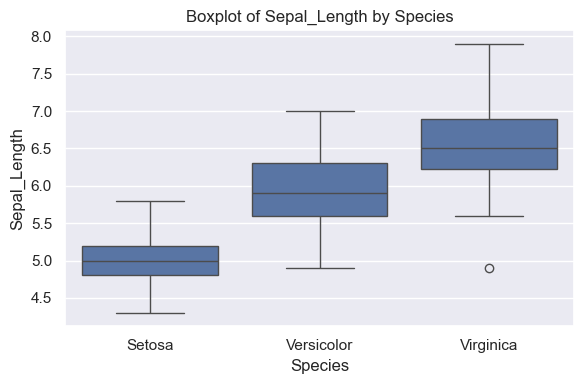

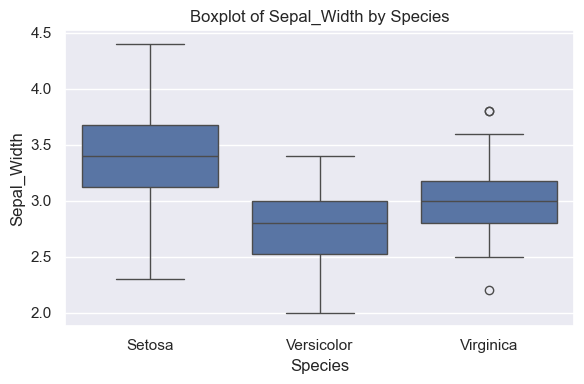

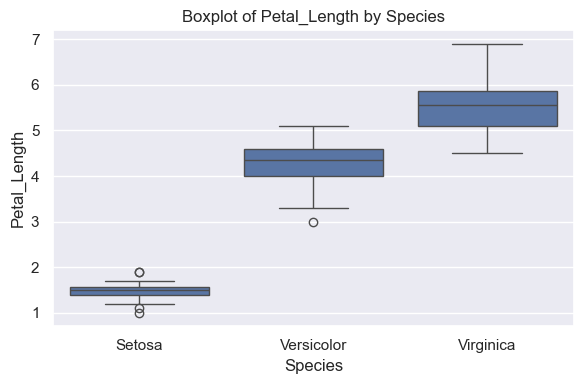

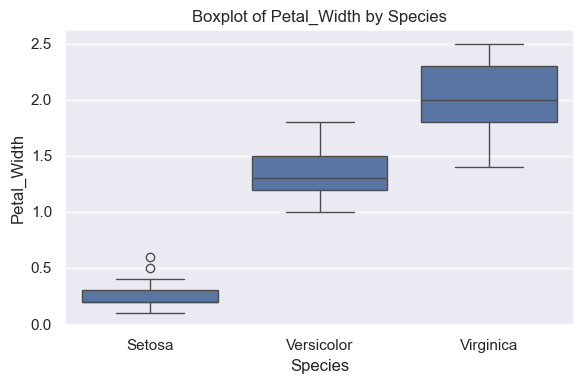

In [321]:
#Function to create boxplots
def create_boxplot(column): 
    plt.figure(figsize=(6, 4)) 
    sns.boxplot(x = 'Species', y=column, data=df) 
    plt.title(f'Boxplot of {column} by Species') 
    plt.tight_layout()
    plt.show() 
# Create boxplots for each column
columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'] 
for col in columns: 
    create_boxplot(col)

#### Insights on Distribution:

**Petal Width**

Setosa has the smallest petal width, with a narrow range and no outliers. Versicolor shows a wider range of petal widths, with a few outliers.
Virginica has the largest petal width, with a wider range and some outliers.

**Petal Length**

Setosa has the smallest petal length, with a narrow range and no outliers. Versicolor shows a moderate range of petal lengths, with a few outliers.Virginica has the largest petal length, with a wider range and some outliers.

**Sepal Length**

Setosa has the smallest sepal length, with a narrow range and no outliers. Versicolor shows a moderate range of sepal lengths, with a few outliers. Virginica has the largest sepal length, with a wider range and some outliers.

**Sepal Width**

Setosa has the largest sepal width, with a narrow range and no outliers. Versicolor shows a moderate range of sepal widths, with a few outliers. Virginica has the smallest sepal width, with a wider range and some outliers.

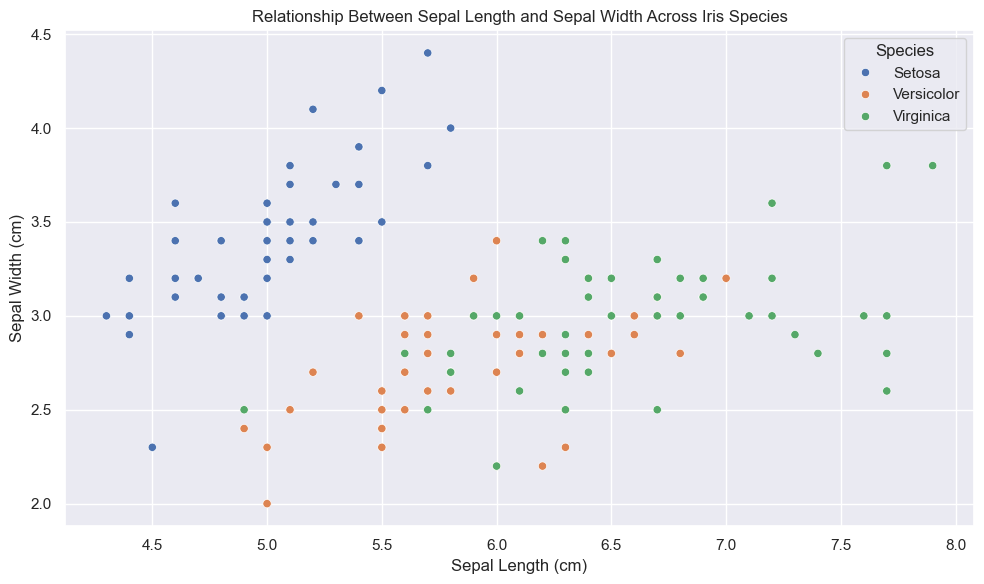

In [335]:
# Scatterplot: Sepal Length vs Sepal Width
plt.figure(figsize = (10,6))
sns.scatterplot(df, x = "Sepal_Length", y="Sepal_Width", hue="Species")
plt.title('Relationship Between Sepal Length and Sepal Width Across Iris Species')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.tight_layout()
plt.show()


In [345]:
correlation = df[['Sepal_Length', 'Sepal_Width']].corr()
correlation

,Sepal_Length,Sepal_Width
Sepal_Length,1.000000,-0.109369
Sepal_Width,-0.109369,1.000000


#### Insights
1. The setosa species has smaller sepal lengths, between 4.0 and 5.5cm, and larger sepal widths, between 3.0 and 4.5 cm
2. The vesicolor species has sepal lengths mostly between 5.0 and 7.0 cm and sepal widths between 2.0 and 3.5 cm.
3. The virginica species has the largest sepal lengths, between 6 and 8 cm, and sepal widths between 2.0 and 3.5 cm.

The correlation between Sepal length and sepal width is -0.109369, which indicates a very weak negative correlation. Since it is close to 0, there is little to no linear relationship between these two variables.

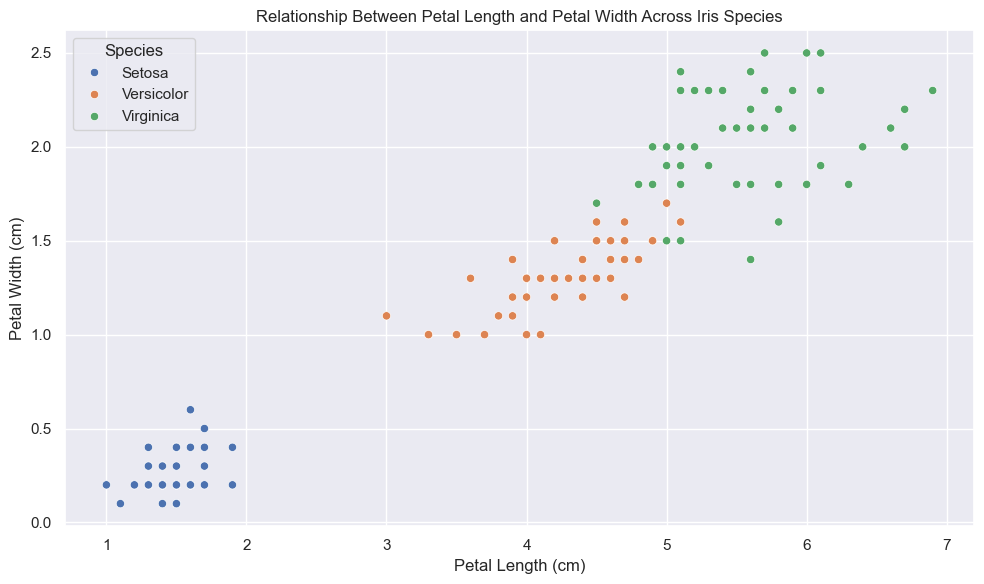

In [347]:
# Scatterplot: Petal Length vs. Petal Width
plt.figure(figsize = (10,6))
sns.scatterplot(df, x = "Petal_Length", y="Petal_Width", hue="Species")
plt.title('Relationship Between Petal Length and Petal Width Across Iris Species')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.tight_layout()
plt.show()


In [348]:
correlation = df[['Petal_Length', 'Petal_Width']].corr()
correlation

,Petal_Length,Petal_Width
Petal_Length,1.000000,0.962757
Petal_Width,0.962757,1.000000


#### Insights
1. Setosa species have the smallest petal length as well as petal width
2. Versicolor species have average petal length and petal width
3. Virginica species have the highest petal length as well as petal width

A correlation coefficient of 0.962757 indicates a very strong positive correlation between the two variables.

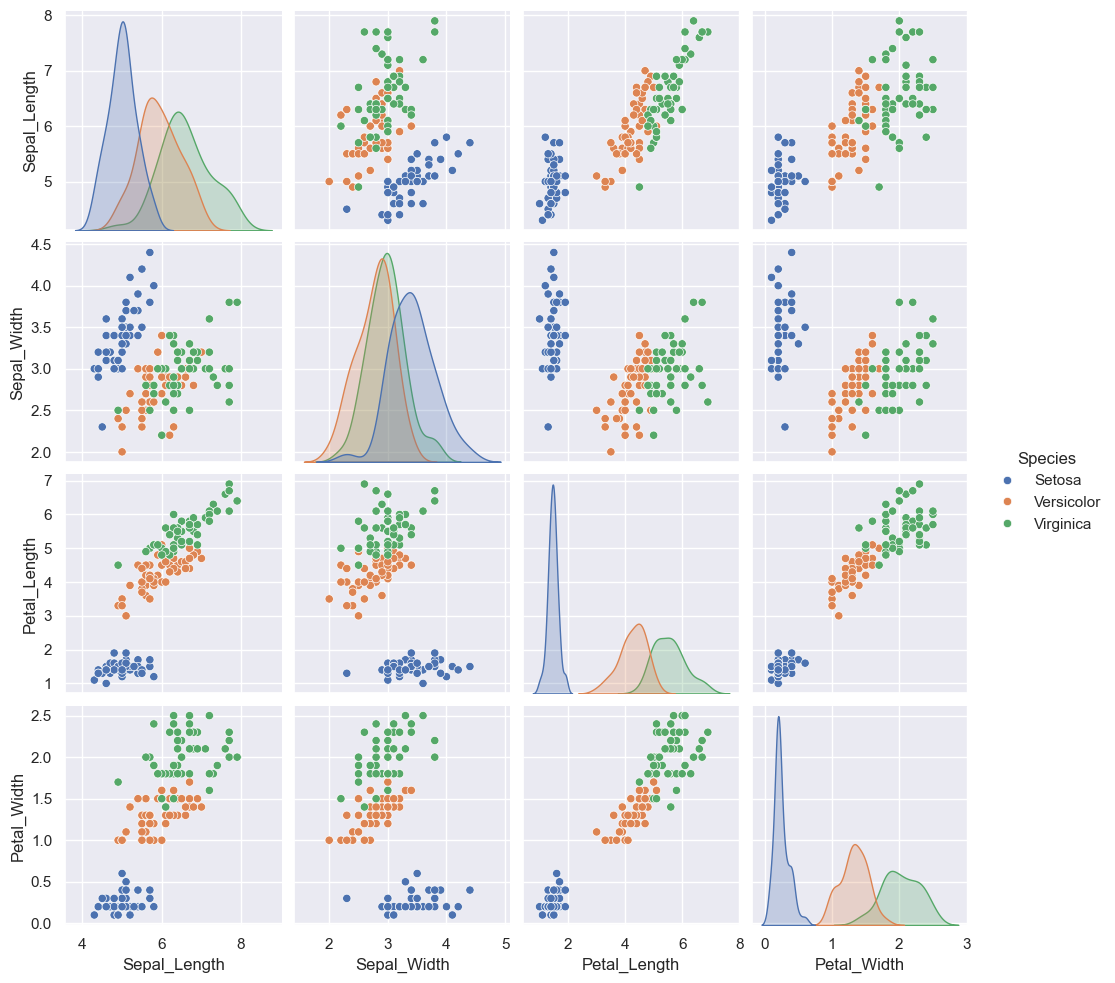

In [350]:

sns.pairplot(df, hue='Species')
#plt.tight_layout()
plt.show()

From the scatter plots above,the three classes appear relatively well separated using sepal and petal measurements.

## Model Selection and Evaluation

In [353]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [354]:
#Define X and y
data = df.copy()
X = data.drop('Species', axis=1)
y = data['Species']

In [356]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [357]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### K-Nearest Neighbors

To predict a new data point, the K-Nearest Neighbors (KNN) algorithm identifies the closest point in the training set. It then assigns the label of this nearest point to the new data point.

In [359]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred1 = knn_model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred1)}")


Model Accuracy: 1.0


A model accuracy of 1 (100%) often indicates that the model might be overfitting the training data. Overfitting occurs when the model learns the training data too well, including noise and outliers, which can lead to poor generalization on new, unseen data.
I will conduct cross validation to evaluate performance on different subsets of the data.

In [361]:

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores)}")

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9733333333333334


The KNN classifier is performing very well across different folds, with a mean accuracy of approximately 97.33%. This indicates that the model is both accurate and consistent.

### Logistic Regression 

In [364]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


In [365]:
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

Model Accuracy: 1.0


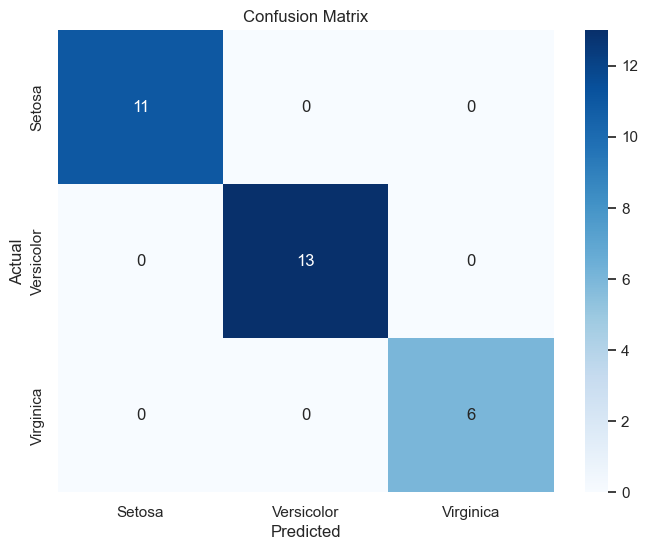

In [366]:
cm = confusion_matrix(y_test, y_pred) 
# Create a heatmap for the confusion matrix 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_) 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix') 
plt.show()

In [367]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

The model has perfectly classified all instances, resulting in no false positives or false negatives.